In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.shape

(16598, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data['Year'].fillna(data['Year'].mean(),inplace=True)

In [8]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [9]:
data.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
King Records                       1
Boost On                           1
Glams                              1
Tripwire Interactive               1
Ongakukan                          1
Name: Publisher, Length: 578, dtype: int64

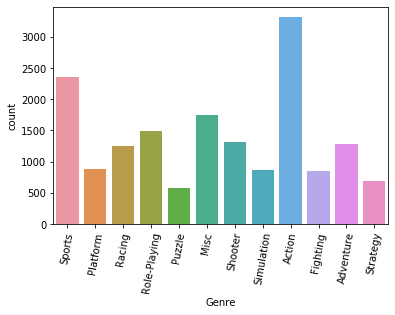

In [10]:
plt.xticks(rotation = 80)
x_axis = data['Genre']
sns.countplot(x= x_axis, data = data)

Most Sold game in  each zoner

In [11]:
# most_sale = data[['Genre','Name']].groupby['Genre'].agg(lambda x:x.value_counts().index[0])
# temp = most_sale.rename(columns = {'Name':'Game'},inplace = False)
# most_sale

In [12]:
#Now filling missing value of publisher column with unknown
data['Publisher'].fillna('Unknown',inplace=True)

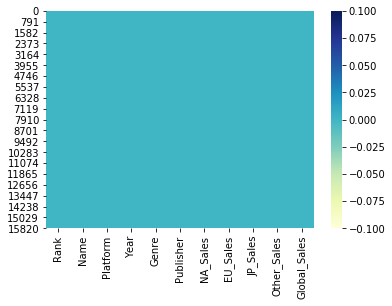

In [13]:
#Displaying heat map to show there is no unknown value
sns.heatmap(data.isnull(),cmap="YlGnBu")

Exploratory Analysis and Visualization
TODO - We will check each and every column and will try to find out relations and will try to extract as much as information as we can

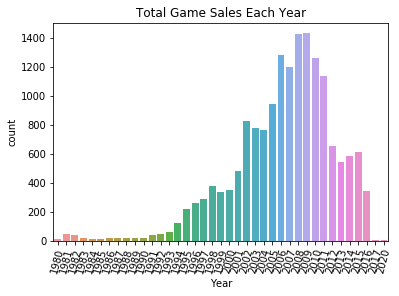

In [14]:
plt.xticks(rotation = 75)
x_axis = data['Year'].astype(int)
sns.countplot(x = x_axis,data = data)
plt.title('Total Game Sales Each Year')
plt.show()

In [15]:
sales_year = data.groupby(data['Year'],as_index = False).sum()

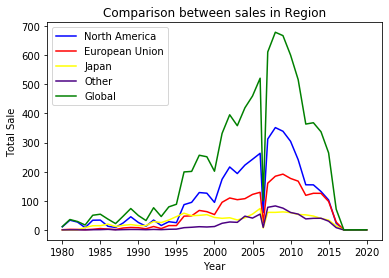

In [16]:
plt.plot(sales_year['Year'], sales_year['NA_Sales'],color='blue')
plt.plot(sales_year['Year'], sales_year['EU_Sales'],color='red')
plt.plot(sales_year['Year'], sales_year['JP_Sales'],color='yellow')
plt.plot(sales_year['Year'], sales_year['Other_Sales'],color='indigo')
plt.plot(sales_year['Year'], sales_year['Global_Sales'],color='green')
plt.legend(["North America", "European Union","Japan","Other","Global"])
plt.xlabel("Year")
plt.ylabel("Total Sale")
plt.title("Comparison between sales in Region")
plt.show()

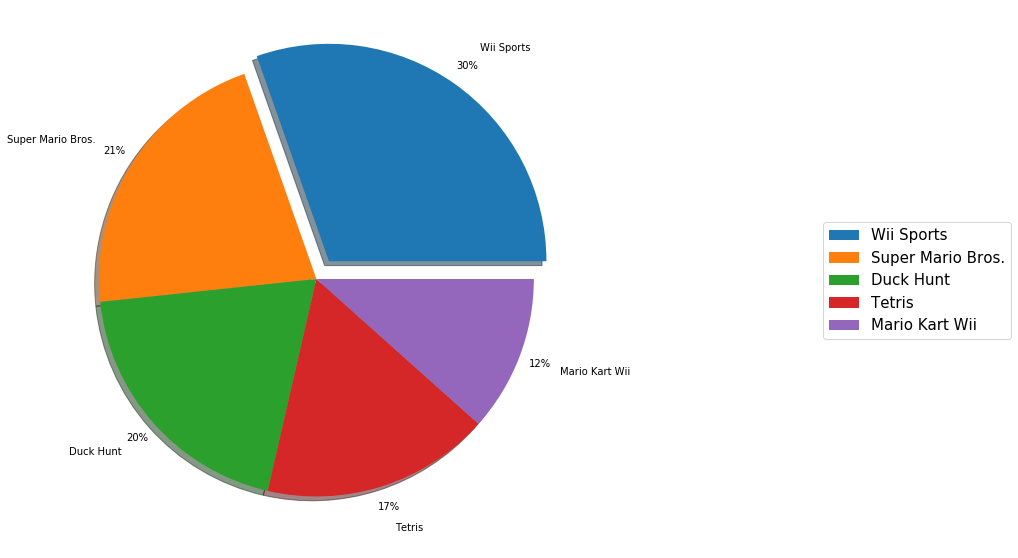

In [17]:
sorted_games_NA = data.sort_values('NA_Sales',ascending = False).head(5)

plt.rcParams["figure.figsize"] = (20, 10)

explode = np.zeros(len(sorted_games_NA['NA_Sales']),dtype = float)

explode[0] = 0.1
exploded = tuple(explode)

plt.pie(sorted_games_NA['NA_Sales'], labels = sorted_games_NA['Name'], 
        autopct='%1.0f%%', 
        pctdistance=1.1, 
        labeldistance=1.2,explode=exploded,shadow=True)

plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.show()



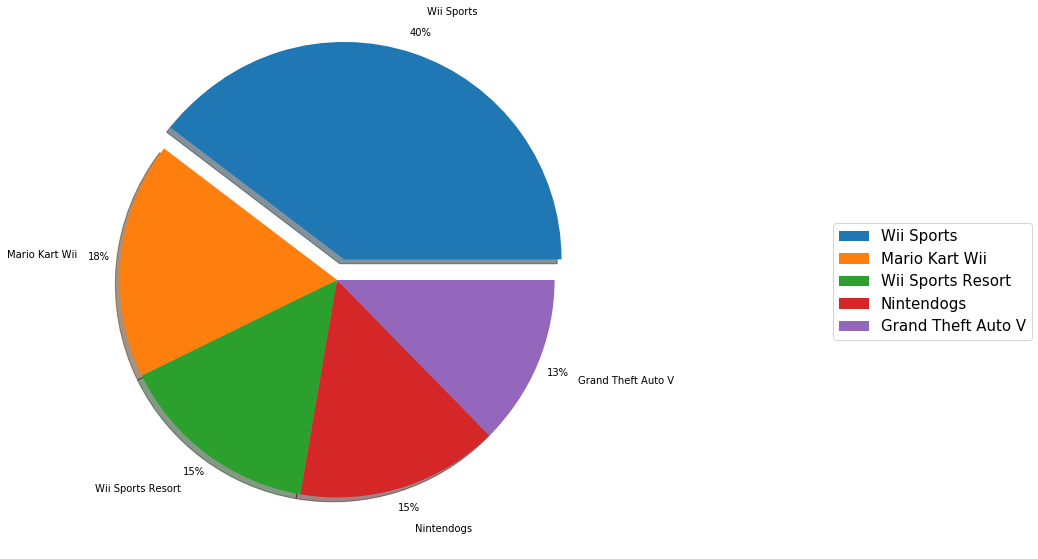

In [18]:
sorted_games_EU = data.sort_values('EU_Sales',ascending = False).head(5)

plt.rcParams["figure.figsize"] = (20, 10)

explode = np.zeros(len(sorted_games_EU['EU_Sales']),dtype = float)

explode[0] = 0.1
exploded = tuple(explode)

plt.pie(sorted_games_EU['EU_Sales'], labels = sorted_games_EU['Name'], 
        autopct='%1.0f%%', 
        pctdistance=1.1, 
        labeldistance=1.2,explode=exploded,shadow=True)

plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [19]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


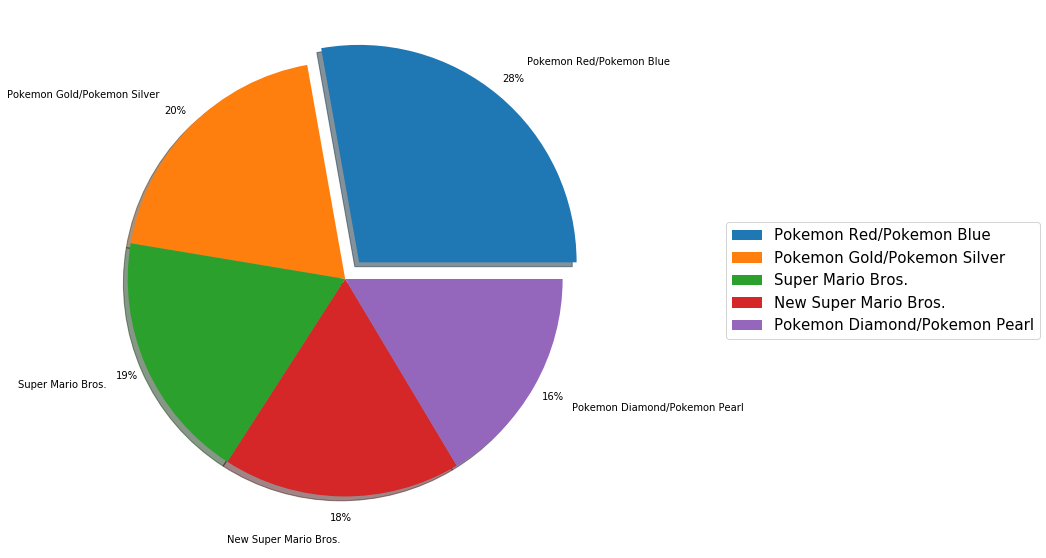

In [20]:
sorted_games_JP = data.sort_values('JP_Sales',ascending = False).head(5)

plt.rcParams["figure.figsize"] = (20, 10)

explode = np.zeros(len(sorted_games_JP['JP_Sales']),dtype = float)

explode[0] = 0.1
exploded = tuple(explode)

plt.pie(sorted_games_JP['JP_Sales'], labels = sorted_games_JP['Name'], 
        autopct='%1.0f%%', 
        pctdistance=1.1, 
        labeldistance=1.2,explode=exploded,shadow=True)

plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

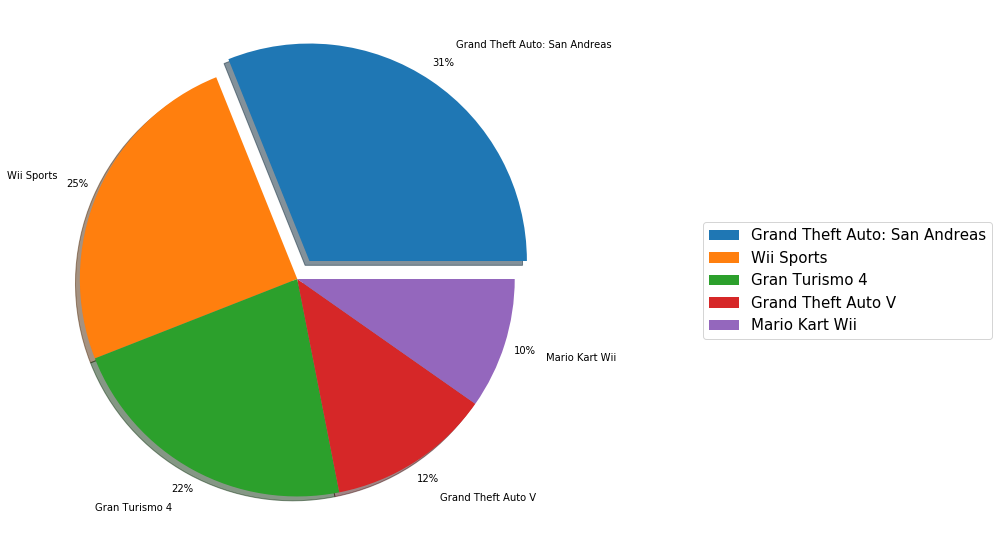

In [21]:
sorted_games_other = data.sort_values('Other_Sales',ascending = False).head(5)

plt.rcParams["figure.figsize"] = (20, 10)

explode = np.zeros(len(sorted_games_other['Other_Sales']),dtype = float)

explode[0] = 0.1
exploded = tuple(explode)

plt.pie(sorted_games_other['Other_Sales'], labels = sorted_games_other['Name'], 
        autopct='%1.0f%%', 
        pctdistance=1.1, 
        labeldistance=1.2,explode=exploded,shadow=True)

plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

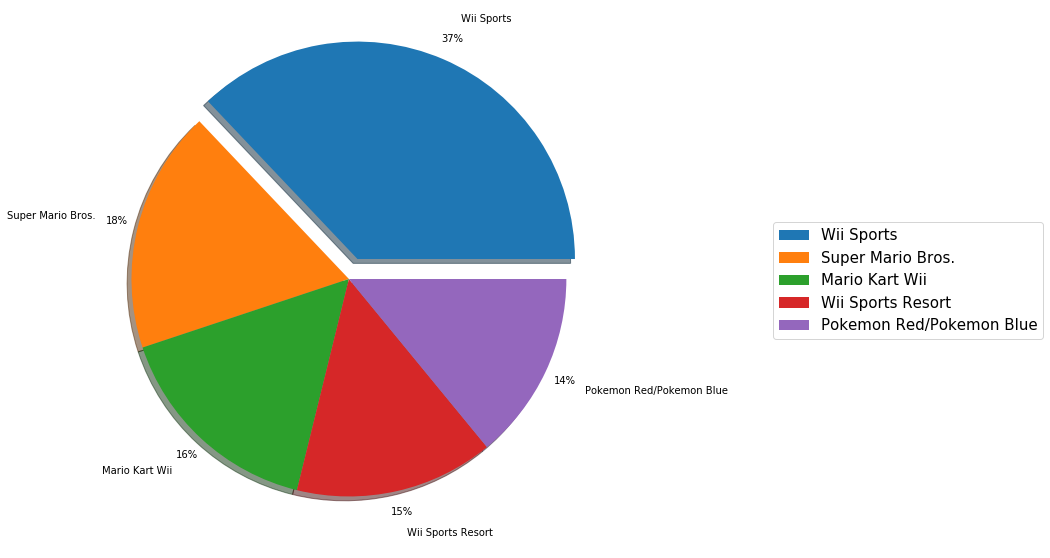

In [22]:
sorted_games_Global_Sales = data.sort_values('Global_Sales',ascending = False).head(5)

plt.rcParams["figure.figsize"] = (20, 10)

explode = np.zeros(len(sorted_games_Global_Sales['Global_Sales']),dtype = float)

explode[0] = 0.1
exploded = tuple(explode)

plt.pie(sorted_games_Global_Sales['Global_Sales'], labels = sorted_games_Global_Sales['Name'], 
        autopct='%1.0f%%', 
        pctdistance=1.1, 
        labeldistance=1.2,explode=exploded,shadow=True)

plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [23]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
King Records                       1
Boost On                           1
Glams                              1
Tripwire Interactive               1
Ongakukan                          1
Name: Publisher, Length: 578, dtype: int64

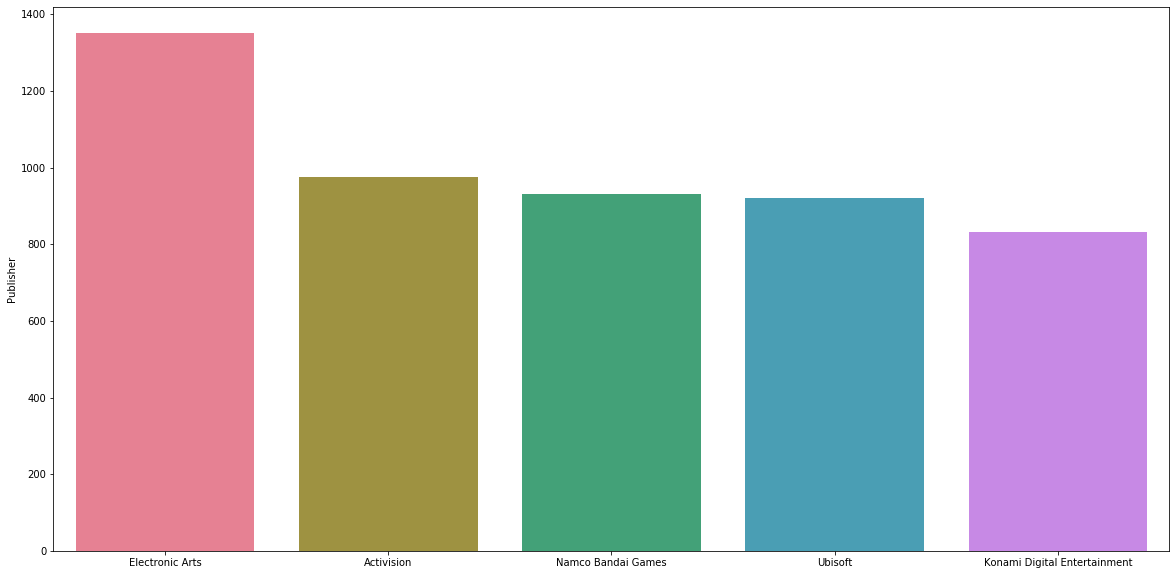

In [24]:
Publisher = data['Publisher'].value_counts().head(5)
sns.barplot(x = Publisher.index,y=Publisher,palette="husl")

In [25]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


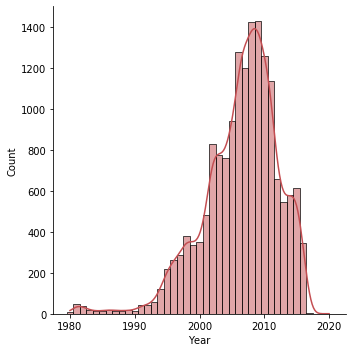

In [26]:
let = data['Year']
sns.set_color_codes()
sns.displot(let, binwidth = 3,color='r',bins=30,discrete=True,kde = True)
plt.show()

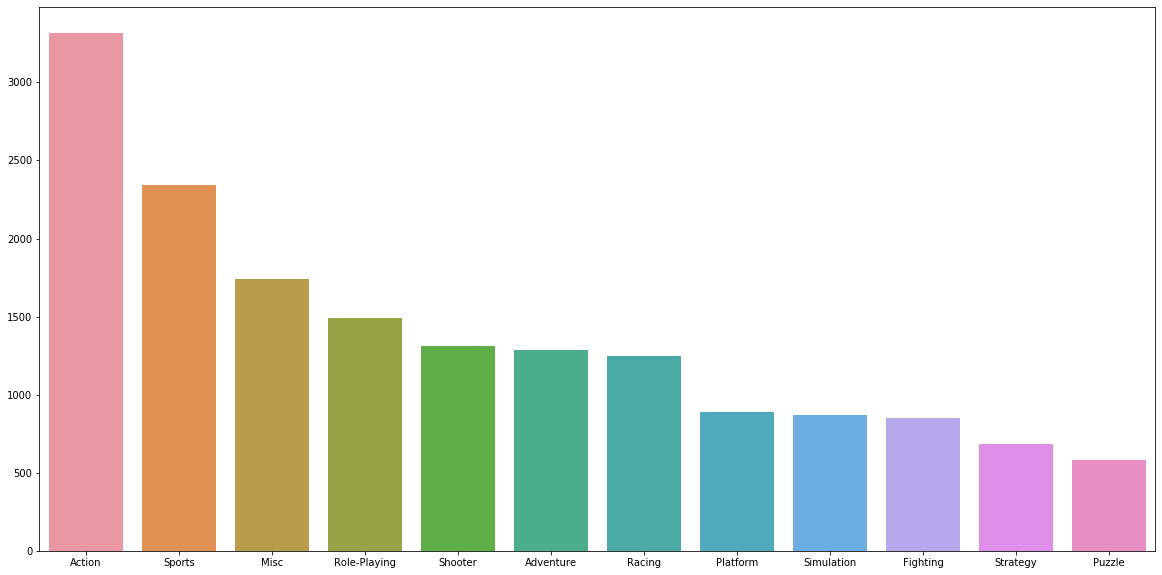

In [27]:
hist = data['Genre'].value_counts()
xhist = hist.index
yhist = hist.values
sns.barplot(x = xhist,y=yhist)

In [36]:
data1 = data[['Genre','Name']]
best = data1.groupby('Genre')

best.agg(lambda x:x.value_counts().index[0])

,Name
Genre,
Action,LEGO Marvel Super Heroes
Adventure,The Walking Dead: Season One
Fighting,WWE SmackDown vs Raw 2008
Misc,Monopoly
Platform,Spider-Man 3
Puzzle,Bejeweled 3
Racing,Need for Speed: Most Wanted
Role-Playing,Marvel: Ultimate Alliance
Shooter,"Transformers: Revenge of the Fallen (XBox 360,..."


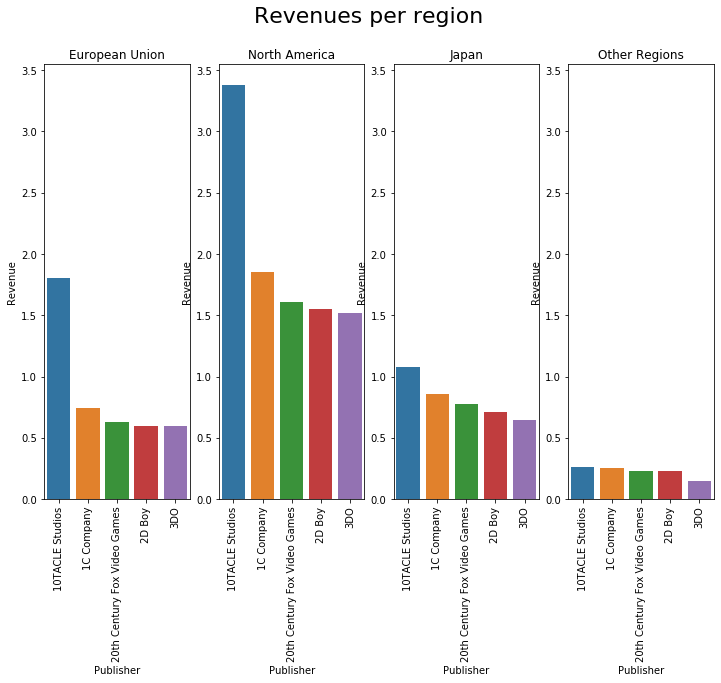

In [40]:
plot_publishers = data.groupby('Publisher')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].mean()

sort_publishers = plot_publishers.sort_values('EU_Sales',ascending=False);
fig = plt.figure(figsize=(12,8));
ax1 = fig.add_subplot(1,4,1);
ax1.set_xticklabels(labels = 'European Union', rotation=90);
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).EU_Sales);
plt.title('European Union');
plt.ylabel('Revenue');
plt.suptitle('Revenues per region',size=22);

sort_publishers = plot_publishers.sort_values('NA_Sales',ascending=False);
ax2 = fig.add_subplot(1,4,2,sharey=ax1);
ax2.set_xticklabels(labels = 'North America', rotation=90);
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).NA_Sales);
plt.title('North America');
plt.ylabel('Revenue');

sort_publishers = plot_publishers.sort_values('JP_Sales',ascending=False);
ax3 = fig.add_subplot(1,4,3,sharey=ax1);
ax3.set_xticklabels(labels = 'Japan', rotation=90);
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).JP_Sales);
plt.title('Japan');
plt.ylabel('Revenue');

sort_publishers = plot_publishers.sort_values('Other_Sales',ascending=False);
ax4 = fig.add_subplot(1,4,4,sharey=ax1);
ax4.set_xticklabels(labels = 'Japan', rotation=90);
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).Other_Sales);
plt.title('Other Regions');
plt.ylabel('Revenue');



In [37]:
number_df = data.groupby('Publisher')[['Name']].count().sort_values('Name', ascending = False).head(50)
number_df


,Name
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


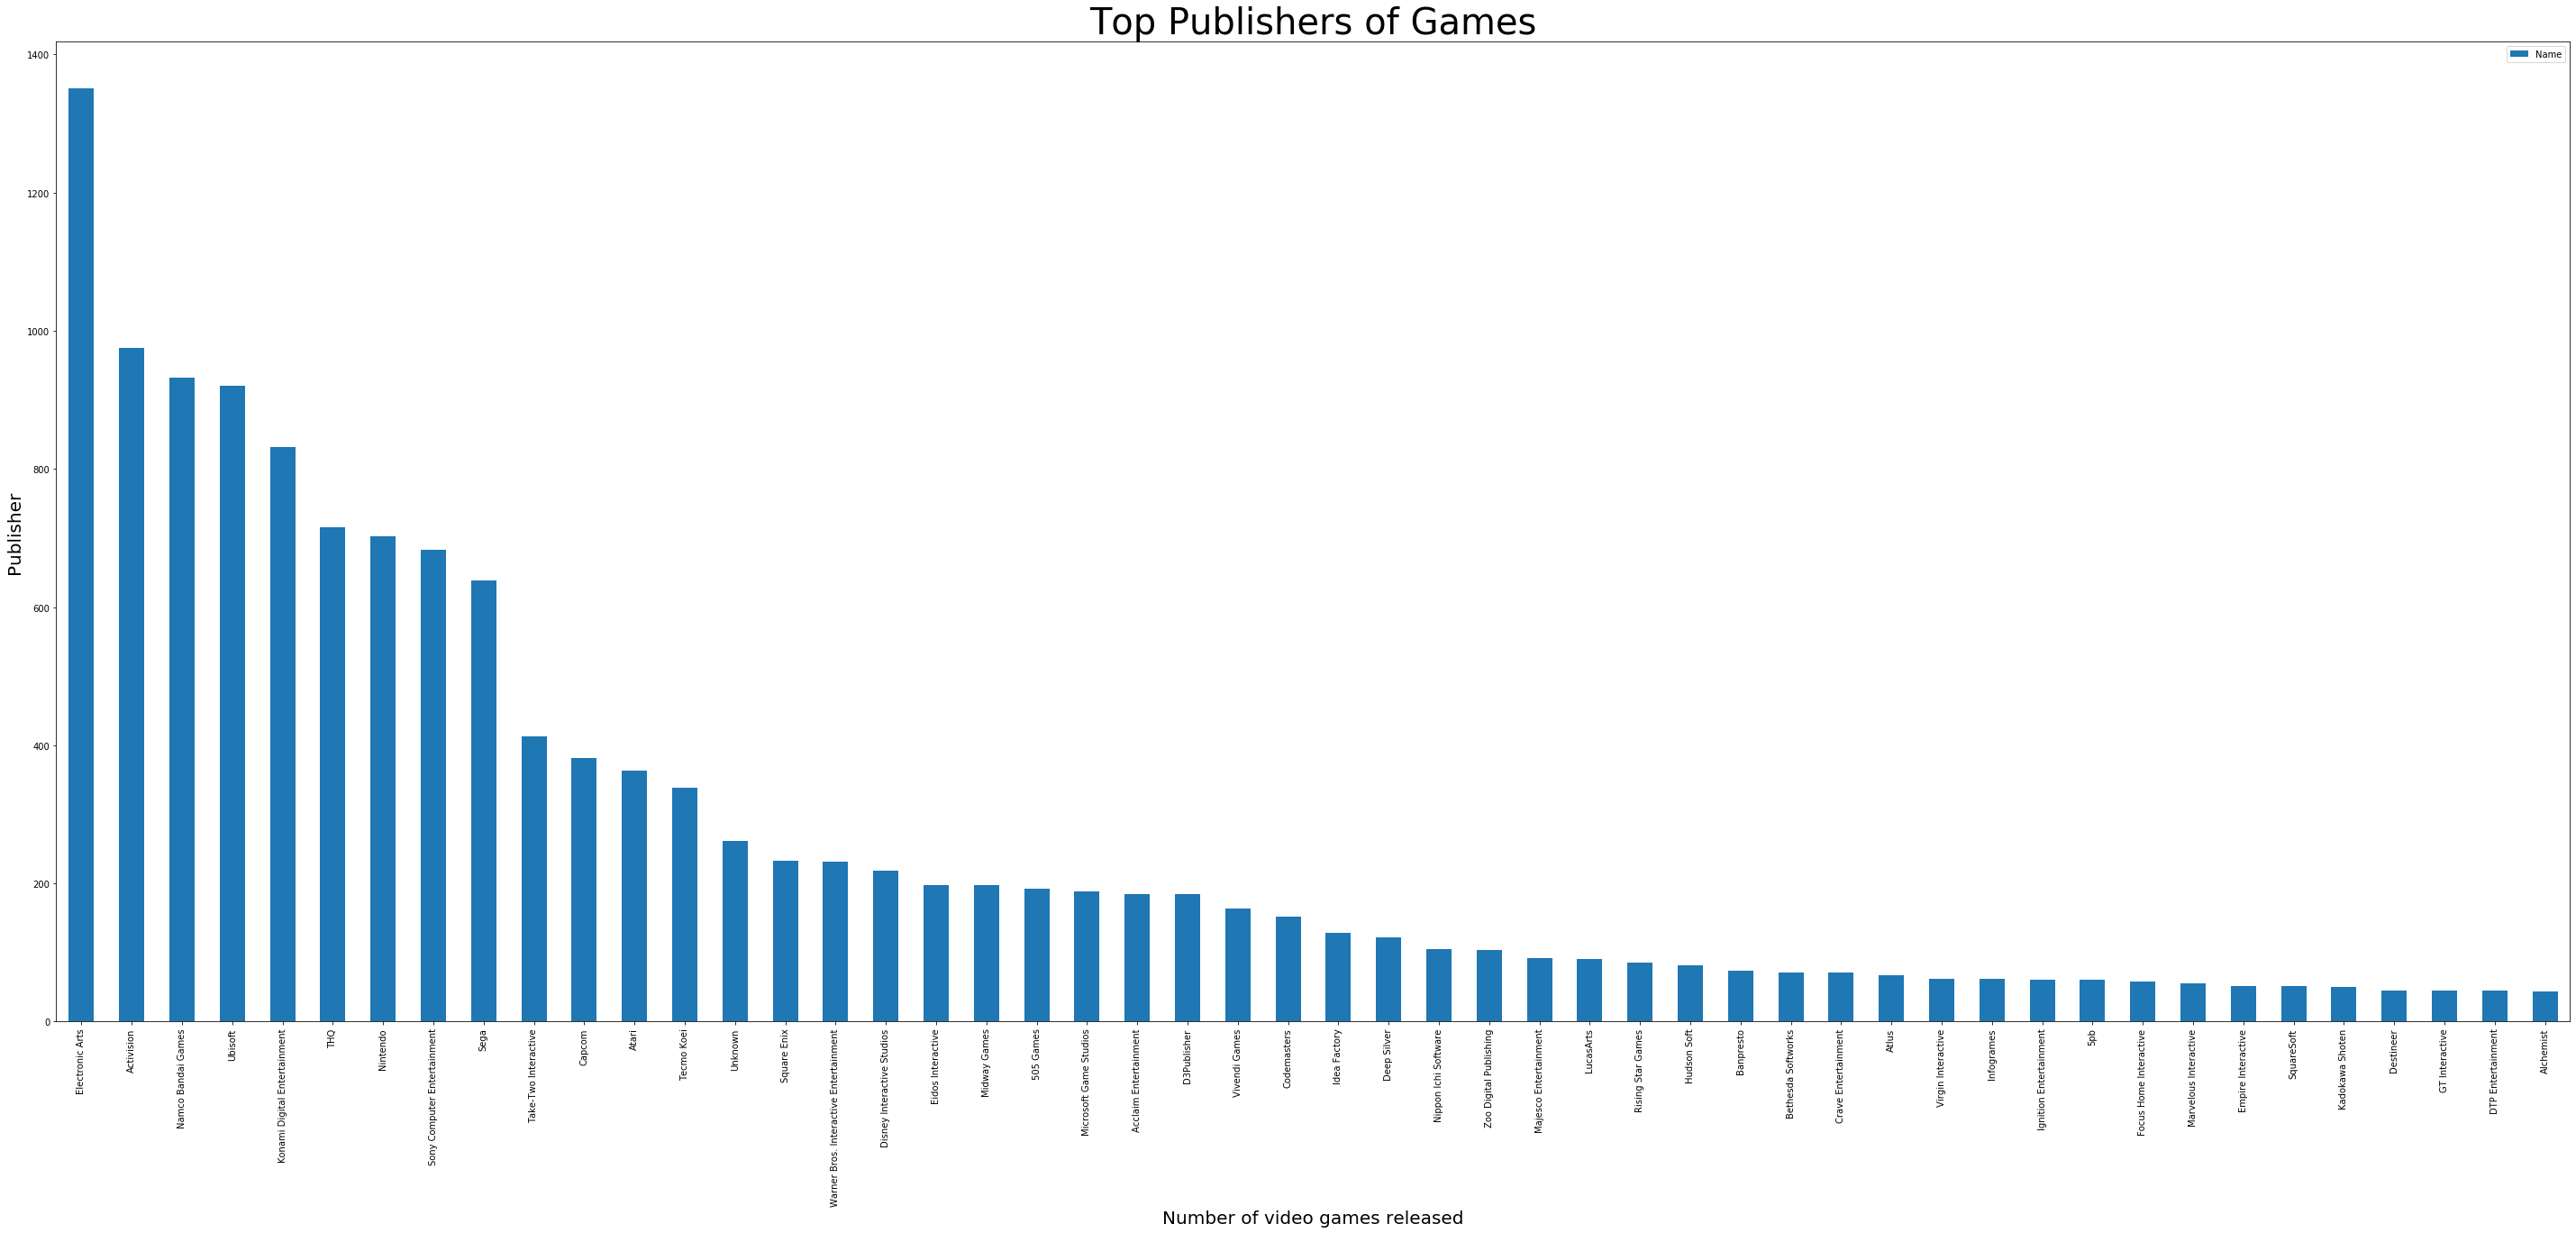

In [39]:
number_df.plot(kind = 'bar', figsize = (50, 20));
plt.xlabel('Number of video games released', fontsize = 20);
plt.ylabel('Publisher', fontsize = 20);
plt.title('Top Publishers of Games', fontsize = 40);

Conclusion:

Action games are the most popular games and individuals like the action games most out of all type of Genres